In [1]:
from getdist import loadMCSamples,MCSamples
from getdist import plots
import getdist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jla_root_o4 = "/home/manvendra/post_doc_ahduni/sim/monte_python/montepython_public/chains/vaa_o4/iucaa_data_spt3gPlus/spt3gplussptpollens_bao/get_dist/rem_"
jla_root = "/home/manvendra/post_doc_ahduni/sim/monte_python/montepython_public/chains/vaa/iucaa_data_spt3g/spt3gplussptpollens_bao/get_dist/rem_"
#bao_root = "/home/zer0/0/class/montepython_public-3.3/chains/tach_edits/get_dist/exp/bao_run2/rem_"
#cmb_o_root = "/home/zer0/0/class/montepython_public-3.3/chains/tach_edits/get_dist/exp/cmb_only/loc_"
#cmb_bao_root = "/home/zer0/0/class/montepython_public-3.3/chains/tach_edits/get_dist/exp/cmb_bao/loc_"


In [3]:
jla_smp_o4 = loadMCSamples(jla_root_o4, settings={'ignore_rows':0.3}) 
jla_smp = loadMCSamples(jla_root, settings={'ignore_rows':0.3}) 
#bao_smp = loadMCSamples(bao_root, settings={'ignore_rows':0.3}) 
#cmb_o_smp = loadMCSamples(cmb_o_root, settings={'ignore_rows':0.3})
#cmb_bao_smp = loadMCSamples(cmb_bao_root, settings={'ignore_rows':0.3})


In [4]:
p_o4 = jla_smp_o4.getParams()
p = jla_smp.getParams()

#jla_smp.addDerived((5+p.x2)** 2, name='z', label='z_d')

In [14]:
def gen_rho(a_min=0.09,a_max=0.99,na=200,jla_root=jla_root,order=3,ind_p="a"):
    
    a_l = np.linspace(a_min,a_max,na)
    z_l = np.linspace(0.0001,10.0,na)
    lst_a = []
    lst_bf = []
    lst_ll = []
    lst_ul = []
    lst_ll2 = []
    lst_ul2 = []
    i=0
    if ind_p=="a":
        for aw in a_l:
            
            if(i%10==0):
                print(i,aw,ind_p)
            jla_smp = loadMCSamples(jla_root, settings={'ignore_rows':0.3}) 
            p = jla_smp.getParams()
            la = []
            nm = 'rbyr0'+str(aw)
            if order==4:
                numr = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0+ p.gamma_vaa_fld*(aw-p.am_vaa_fld)**4.0)
                denm = (1.0 + p.alpha_vaa_fld*(1.0-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(1.0-p.am_vaa_fld)**3.0 + p.gamma_vaa_fld*(1.0-p.am_vaa_fld)**4.0)
            else:
                numr = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0)
                denm = (1.0 + p.alpha_vaa_fld*(1.0-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(1.0-p.am_vaa_fld)**3.0 )
            rho_by_rho_0 = numr/denm
            jla_smp.addDerived(rho_by_rho_0, label=nm,name=nm)
            m1s = jla_smp.getMargeStats()
            ap = m1s.parWithName(nm) 
        #la = [aw,ap.bestfit_sample,ap.limits[1].lower,ap.limits[1].upper]
            lst_a.append(aw)
            lst_bf.append(ap.mean)
            ttl = jla_smp.twoTailLimits(rho_by_rho_0,0.68)
            ttl2 = jla_smp.twoTailLimits(rho_by_rho_0,0.96)
        #print(ttl)
            lst_ll.append(ttl[0])
            lst_ul.append(ttl[1])
        
            lst_ll2.append(ttl2[0])
            lst_ul2.append(ttl2[1])
        #lst_ll.append(ap.limits[1].lower)
        #lst_ul.append(ap.limits[1].upper)
            i = i+1
    
    else:
        for z in z_l:
            aw = 1.0/(z+1.0)
            if(i%10==0):
                print(i,aw)
            jla_smp = loadMCSamples(jla_root, settings={'ignore_rows':0.3}) 
            p = jla_smp.getParams()
            la = []
            nm = 'rbyr0'+str(aw)
            if order==4:
                numr = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0+ p.gamma_vaa_fld*(aw-p.am_vaa_fld)**4.0)
                denm = (1.0 + p.alpha_vaa_fld*(1.0-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(1.0-p.am_vaa_fld)**3.0 + p.gamma_vaa_fld*(1.0-p.am_vaa_fld)**4.0)
            else:
                numr = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0)
                denm = (1.0 + p.alpha_vaa_fld*(1.0-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(1.0-p.am_vaa_fld)**3.0 )
            rho_by_rho_0 = numr/denm
            jla_smp.addDerived(rho_by_rho_0, label=nm,name=nm)
            m1s = jla_smp.getMargeStats()
            ap = m1s.parWithName(nm) 
        #la = [aw,ap.bestfit_sample,ap.limits[1].lower,ap.limits[1].upper]
            lst_a.append(z)
            lst_bf.append(ap.mean)
            ttl = jla_smp.twoTailLimits(rho_by_rho_0,0.68)
            ttl2 = jla_smp.twoTailLimits(rho_by_rho_0,0.96)
        #print(ttl)
            lst_ll.append(ttl[0])
            lst_ul.append(ttl[1])
        
            lst_ll2.append(ttl2[0])
            lst_ul2.append(ttl2[1])
        #lst_ll.append(ap.limits[1].lower)
        #lst_ul.append(ap.limits[1].upper)
            i = i+1
    return (np.array(lst_a),np.array(lst_bf),np.array(lst_ll),np.array(lst_ul),np.array(lst_ll2),np.array(lst_ul2))
        
    

    
def gen_w(a_min=0.09,a_max=0.99,na=200,jla_root=jla_root,order=3,ind_p="a"):
    
    a_l = np.linspace(a_min,a_max,na)
    z_l = np.linspace(0.0001,3.0,na)
    lst_a = []
    lst_bf = []
    lst_ll = []
    lst_ul = []
    lst_ll2 = []
    lst_ul2 = []
    i=0
    if ind_p=="a":
        for aw in a_l:
            
            if(i%10==0):
                print(i,aw,ind_p)
            jla_smp = loadMCSamples(jla_root, settings={'ignore_rows':0.3}) 
            p = jla_smp.getParams()
            la = []
            nm = 'w'+str(aw)
            if order==4:
                numr = (2.0*p.alpha_vaa_fld*(aw-p.am_vaa_fld)+ 3.0*p.beta_vaa_fld*(aw-p.am_vaa_fld)**2.0 + 4.0*p.gamma_vaa_fld*(aw-p.am_vaa_fld)**3.0)
                denm = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0 + p.gamma_vaa_fld*(aw-p.am_vaa_fld)**4.0)
            else:
                numr = (2.0*p.alpha_vaa_fld*(aw-p.am_vaa_fld)+ 3.0*p.beta_vaa_fld*(aw-p.am_vaa_fld)**2.0)
                denm = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0)
            w = -1.0 - aw*numr/(3.0*denm)
            jla_smp.addDerived(w, label=nm,name=nm)
            m1s = jla_smp.getMargeStats()
            ap = m1s.parWithName(nm) 
        #la = [aw,ap.bestfit_sample,ap.limits[1].lower,ap.limits[1].upper]
            lst_a.append(aw)
            lst_bf.append(ap.mean)
            ttl = jla_smp.twoTailLimits(w,0.68)
            ttl2 = jla_smp.twoTailLimits(w,0.96)
        #print(ttl)
            lst_ll.append(ttl[0])
            lst_ul.append(ttl[1])
        
            lst_ll2.append(ttl2[0])
            lst_ul2.append(ttl2[1])
        #lst_ll.append(ap.limits[1].lower)
        #lst_ul.append(ap.limits[1].upper)
            i = i+1
    
    else:
        for z in z_l:
            aw = 1.0/(z+1.0)
            if(i%10==0):
                print(i,aw)
            jla_smp = loadMCSamples(jla_root, settings={'ignore_rows':0.3}) 
            p = jla_smp.getParams()
            la = []
            nm = 'w'+str(aw)
            if order==4:
                numr = (2.0*p.alpha_vaa_fld*(aw-p.am_vaa_fld)+ 3.0*p.beta_vaa_fld*(aw-p.am_vaa_fld)**2.0 + 4.0*p.gamma_vaa_fld*(aw-p.am_vaa_fld)**3.0)
                denm = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0 + p.gamma_vaa_fld*(aw-p.am_vaa_fld)**4.0)
            else:
                numr = (2.0*p.alpha_vaa_fld*(aw-p.am_vaa_fld)+ 3.0*p.beta_vaa_fld*(aw-p.am_vaa_fld)**2.0)
                denm = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0)
            w = -1.0 - aw*numr/(3.0*denm)
            jla_smp.addDerived(w, label=nm,name=nm)
            m1s = jla_smp.getMargeStats()
            ap = m1s.parWithName(nm) 
        #la = [aw,ap.bestfit_sample,ap.limits[1].lower,ap.limits[1].upper]
            lst_a.append(z)
            lst_bf.append(ap.mean)
            ttl = jla_smp.twoTailLimits(w,0.68)
            ttl2 = jla_smp.twoTailLimits(w,0.96)
        #print(ttl)
            lst_ll.append(ttl[0])
            lst_ul.append(ttl[1])
        
            lst_ll2.append(ttl2[0])
            lst_ul2.append(ttl2[1])
        #lst_ll.append(ap.limits[1].lower)
        #lst_ul.append(ap.limits[1].upper)
            i = i+1
    return (np.array(lst_a),np.array(lst_bf),np.array(lst_ll),np.array(lst_ul),np.array(lst_ll2),np.array(lst_ul2))
        
    
    

In [ ]:
numr = (2.0*p.alpha_vaa_fld*(aw-p.am_vaa_fld)+ 3.0*p.beta_vaa_fld*(aw-p.am_vaa_fld)**2.0 + 4.0*p.gamma_vaa_fld*(aw-p.am_vaa_fld)**3.0)
denm = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0 + p.gamma_vaa_fld*(aw-p.am_vaa_fld)**4.0)


denm = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0)
                
                
numr = (2.0*p.alpha_vaa_fld*(aw-p.am_vaa_fld)+ 3.0*p.beta_vaa_fld*(aw-p.am_vaa_fld)**2.0 + 4.0*p.gamma_vaa_fld*(aw-p.am_vaa_fld)**3.0)
denm = (1.0 + p.alpha_vaa_fld*(aw-p.am_vaa_fld)**2.0 + p.beta_vaa_fld*(aw-p.am_vaa_fld)**3.0 + p.gamma_vaa_fld*(aw-p.am_vaa_fld)**4.0)



In [15]:
#a,b,l,u,l2,u2= gen_rho(ind_p="a")
a,b,l,u,l2,u2= gen_w(ind_p="z")


0 0.9999000099990001
10 0.8689239185062891
20 0.7682866705351252
30 0.6885410507136434
40 0.6237933595159363
50 0.5701762302984773
60 0.5250467067302809
70 0.486537221686651
80 0.4532906738974502
90 0.4242971751829222
100 0.39878968333093195
110 0.376175145635546
120 0.3559878134101504
130 0.3378568230694751


140 0.3214832039565374


150 0.30662326278276175


160 0.2930763726099364


170 0.28067586183356935


180 0.2692821222787113


190 0.2587773304296523


In [16]:
#a4,b4,l4,u4,l24,u24= gen_rho(jla_root=jla_root_o4,order=4,ind_p="a")
a4,b4,l4,u4,l24,u24= gen_w(jla_root=jla_root_o4,order=4,ind_p="z")

0 0.9999000099990001
10 0.8689239185062891
20 0.7682866705351252
30 0.6885410507136434
40 0.6237933595159363
50 0.5701762302984773
60 0.5250467067302809
70 0.486537221686651
80 0.4532906738974502
90 0.4242971751829222
100 0.39878968333093195
110 0.376175145635546
120 0.3559878134101504
130 0.3378568230694751
140 0.3214832039565374
150 0.30662326278276175


160 0.2930763726099364


170 0.28067586183356935


180 0.2692821222787113


190 0.2587773304296523


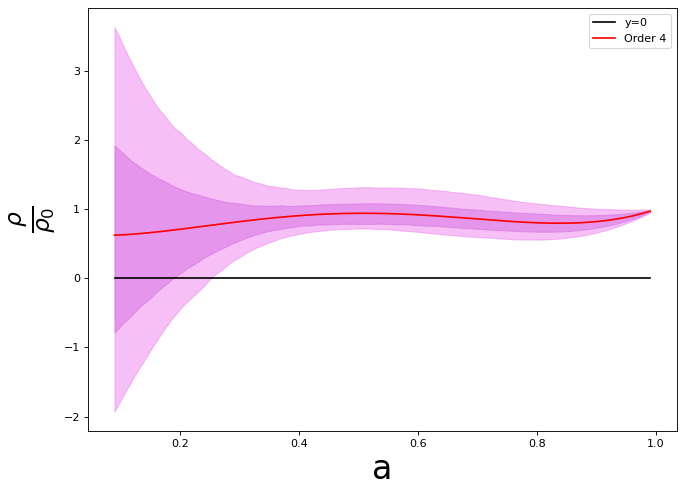

In [8]:
fig=plt.figure(figsize=(9.5,7.0), dpi=80)
#plt.errorbar(a,b,label="Order 3")
plt.errorbar(a4,b4,fmt="r-",label="Order 4")
#plt.fill_between(a4,b4+np.abs(u4),b4-np.abs(l4))
plt.fill_between(a4,l4,u4,color='mediumorchid',alpha=0.5)
plt.fill_between(a4,l24,u24,color='violet',alpha=0.5)
plt.plot(a,np.zeros_like(a),"k-",label="y=0")
plt.xlabel("a",fontsize=30)
#plt.ylabel(r"$\frac{\rho}{\rho_0}$")
plt.ylabel(r"$\frac{\rho}{\rho_{0}}$",fontsize=30)
plt.legend(loc="best",fontsize=10)
fig.savefig("rho_O_4_a.pdf",dpi=fig.dpi,bbox_inches='tight')

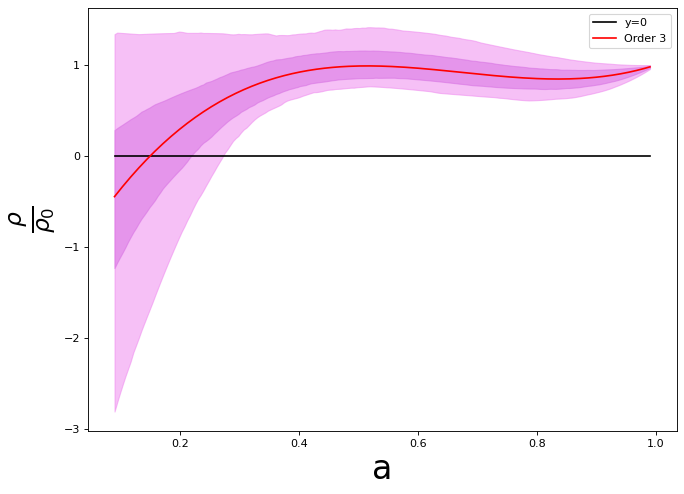

In [9]:
fig=plt.figure(figsize=(9.5,7.0), dpi=80)
#plt.errorbar(a,b,label="Order 3")
plt.errorbar(a,b,fmt="r-",label="Order 3")
#plt.fill_between(a4,b4+np.abs(u4),b4-np.abs(l4))
plt.fill_between(a,l,u,color='mediumorchid',alpha=0.5)
plt.fill_between(a,l2,u2,color='violet',alpha=0.5)
plt.plot(a,np.zeros_like(a),"k-",label="y=0")
plt.xlabel("a",fontsize=30)
#plt.ylabel(r"$\frac{\rho}{\rho_0}$")
plt.ylabel(r"$\frac{\rho}{\rho_{0}}$",fontsize=30)
plt.legend(loc="best",fontsize=10)
fig.savefig("rho_O_3_a.pdf",dpi=fig.dpi,bbox_inches='tight')

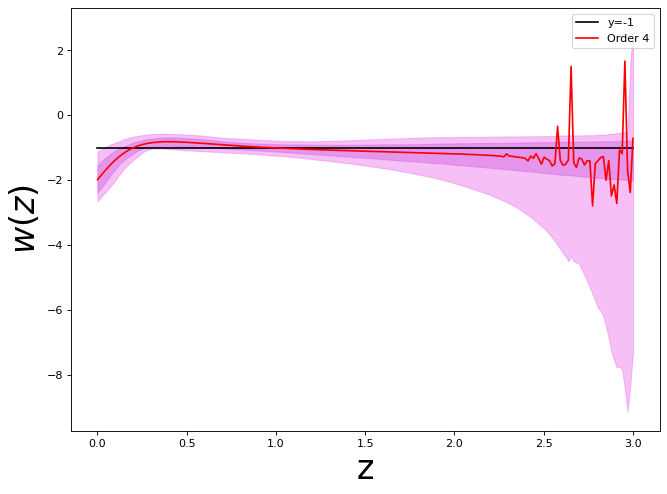

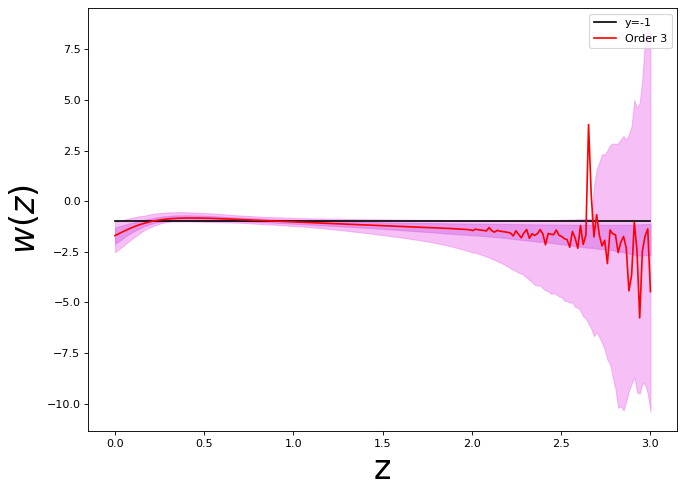

In [17]:
fig=plt.figure(figsize=(9.5,7.0), dpi=80)
#plt.errorbar(a,b,label="Order 3")
plt.errorbar(a4,b4,fmt="r-",label="Order 4")
#plt.fill_between(a4,b4+np.abs(u4),b4-np.abs(l4))
plt.fill_between(a4,l4,u4,color='mediumorchid',alpha=0.5)
plt.fill_between(a4,l24,u24,color='violet',alpha=0.5)
plt.plot(a,-np.ones_like(a),"k-",label="y=-1")
plt.xlabel("z",fontsize=30)
#plt.ylabel(r"$\frac{\rho}{\rho_0}$")
plt.ylabel("$w(z)$",fontsize=30)
plt.legend(loc="best",fontsize=10)
fig.savefig("w_O_4_z_till3.pdf",dpi=fig.dpi,bbox_inches='tight')

fig=plt.figure(figsize=(9.5,7.0), dpi=80)
#plt.errorbar(a,b,label="Order 3")
plt.errorbar(a,b,fmt="r-",label="Order 3")
#plt.fill_between(a4,b4+np.abs(u4),b4-np.abs(l4))
plt.fill_between(a,l,u,color='mediumorchid',alpha=0.5)
plt.fill_between(a,l2,u2,color='violet',alpha=0.5)
plt.plot(a,-np.ones_like(a),"k-",label="y=-1")
plt.xlabel("z",fontsize=30)
#plt.ylabel(r"$\frac{\rho}{\rho_0}$")
plt.ylabel("$w(z)$",fontsize=30)
plt.legend(loc="best",fontsize=10)
fig.savefig("w_O_3_z_till3.pdf",dpi=fig.dpi,bbox_inches='tight')

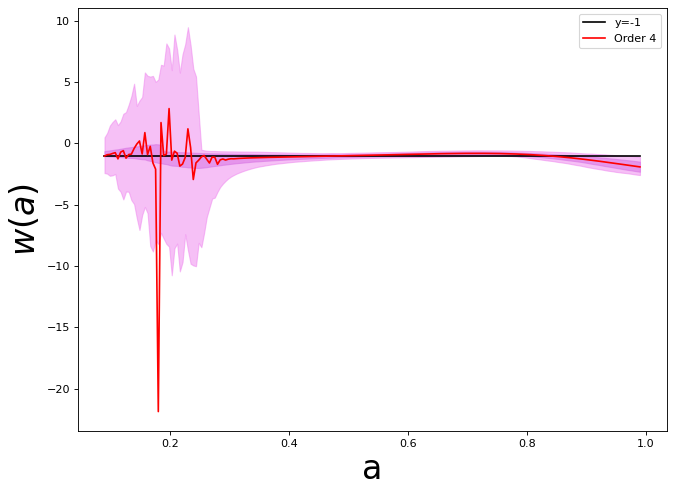

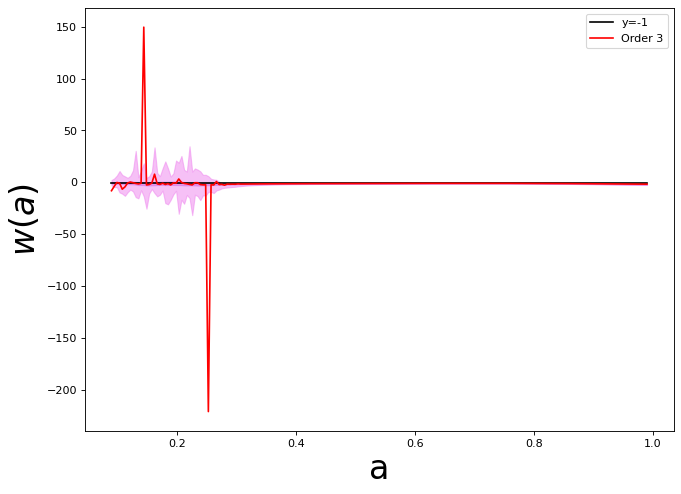

In [10]:
fig=plt.figure(figsize=(9.5,7.0), dpi=80)
#plt.errorbar(a,b,label="Order 3")
plt.errorbar(a4,b4,fmt="r-",label="Order 4")
#plt.fill_between(a4,b4+np.abs(u4),b4-np.abs(l4))
plt.fill_between(a4,l4,u4,color='mediumorchid',alpha=0.5)
plt.fill_between(a4,l24,u24,color='violet',alpha=0.5)
plt.plot(a,-np.ones_like(a),"k-",label="y=-1")
plt.xlabel("a",fontsize=30)
#plt.ylabel(r"$\frac{\rho}{\rho_0}$")
plt.ylabel("$w(a)$",fontsize=30)
plt.legend(loc="best",fontsize=10)
fig.savefig("w_O_4_a.pdf",dpi=fig.dpi,bbox_inches='tight')

fig=plt.figure(figsize=(9.5,7.0), dpi=80)
#plt.errorbar(a,b,label="Order 3")
plt.errorbar(a,b,fmt="r-",label="Order 3")
#plt.fill_between(a4,b4+np.abs(u4),b4-np.abs(l4))
plt.fill_between(a,l,u,color='mediumorchid',alpha=0.5)
plt.fill_between(a,l2,u2,color='violet',alpha=0.5)
plt.plot(a,-np.ones_like(a),"k-",label="y=-1")
plt.xlabel("a",fontsize=30)
#plt.ylabel(r"$\frac{\rho}{\rho_0}$")
plt.ylabel("$w(a)$",fontsize=30)
plt.legend(loc="best",fontsize=10)
fig.savefig("w_O_3_a.pdf",dpi=fig.dpi,bbox_inches='tight')

In [78]:
ff = getdist.densities.Density1D(pp.am_vaa_fld, P=None, view_ranges=None)

In [60]:
def naive_gen_rho(a_min=0.001,a_max=0.99,na=100,jla_root=jla_root,order=3):
    
    a_l = np.linspace(a_min,a_max,na)
    lst_a = []
    lst_bf = []
    lst_ll = []
    lst_ul = []
    
    jla_smp = loadMCSamples(jla_root, settings={'ignore_rows':0.3}) 
    p = jla_smp.getParams()
    ff = jla_smp.getMargeStats()
    print(ff.parWithName('am_vaa_fld').limits[0].lower) 
    print(ff.parWithName('am_vaa_fld').limits[0].upper) 
    
    am_l = ff.parWithName('am_vaa_fld').limits[1].lower
    am_u = ff.parWithName('am_vaa_fld').limits[1].upper
    
    alpha_l = ff.parWithName('alpha_vaa_fld').limits[1].lower
    alpha_u = ff.parWithName('alpha_vaa_fld').limits[1].upper
    
    beta_l = ff.parWithName('beta_vaa_fld').limits[1].lower
    beta_u = ff.parWithName('beta_vaa_fld').limits[1].upper
    
    am = ff.parWithName('am_vaa_fld').bestfit_sample
    alpha = ff.parWithName('alpha_vaa_fld').bestfit_sample
    beta = ff.parWithName('beta_vaa_fld').bestfit_sample
    
    if order==4:
        gamma_l = ff.parWithName('gamma_vaa_fld').limits[1].lower
        gamma_u = ff.parWithName('gamma_vaa_fld').limits[1].upper
        gamma = ff.parWithName('gamma_vaa_fld').bestfit_sample
    
    
    i=0
    for aw in a_l:
        if(i%10==0):
            print(i,aw)
        
        la = []
        nm = 'rbyr0'+str(aw)
        if order==4:
            numr_bf = (1.0 + alpha*(aw-am)**2.0 + beta*(aw-am)**3.0+ gamma*(aw-am)**4.0)
            denm_bf = (1.0 + alpha*(1.0-am)**2.0 + beta*(1.0-am)**3.0+ gamma*(1.0-am)**4.0)
            
            numr_l = (1.0 + alpha_l*(aw-am_l)**2.0 + beta_l*(aw-am_l)**3.0+ gamma_l*(aw-am_l)**4.0)
            denm_l = (1.0 + alpha_l*(1.0-am_l)**2.0 + beta_l*(1.0-am_l)**3.0+ gamma_l*(1.0-am_l)**4.0)
            
            numr_u = (1.0 + alpha_u*(aw-am_u)**2.0 + beta_u*(aw-am_u)**3.0+ gamma_u*(aw-am_u)**4.0)
            denm_u = (1.0 + alpha_u*(1.0-am_u)**2.0 + beta_u*(1.0-am_u)**3.0+ gamma_u*(1.0-am_u)**4.0)
            
        else:
            numr_bf = (1.0 + alpha*(aw-am)**2.0 + beta*(aw-am)**3.0)
            denm_bf = (1.0 + alpha*(1.0-am)**2.0 + beta*(1.0-am)**3.0)
            
            numr_l = (1.0 + alpha_l*(aw-am_l)**2.0 + beta_l*(aw-am_l)**3.0)
            denm_l = (1.0 + alpha_l*(1.0-am_l)**2.0 + beta_l*(1.0-am_l)**3.0)
            
            numr_u = (1.0 + alpha_u*(aw-am_u)**2.0 + beta_u*(aw-am_u)**3.0)
            denm_u = (1.0 + alpha_u*(1.0-am_u)**2.0 + beta_u*(1.0-am_u)**3.0)
            
            
       
        lst_a.append(aw)
        lst_bf.append(numr_bf)
        lst_ll.append(numr_l)
        lst_ul.append(numr_u)
        i = i+1
    return np.array(lst_a),np.array(lst_bf),np.array(lst_ll),np.array(lst_ul)
        

In [61]:
a,b,c,d = naive_gen_rho()

0.7633561577336866
0.8690891404805254
0 0.001
10 0.1008989898989899
20 0.2007979797979798
30 0.3006969696969697
40 0.4005959595959596
50 0.5004949494949494
60 0.6003939393939394
70 0.7002929292929293
80 0.8001919191919192
90 0.900090909090909


In [62]:
b

array([1.49842497, 1.49925732, 1.49967941, 1.49970034, 1.49932922,
       1.49857517, 1.49744727, 1.49595465, 1.49410641, 1.49191165,
       1.48937948, 1.486519  , 1.48333933, 1.47984956, 1.47605881,
       1.47197618, 1.46761077, 1.4629717 , 1.45806807, 1.45290898,
       1.44750355, 1.44186087, 1.43599005, 1.42990021, 1.42360044,
       1.41709985, 1.41040755, 1.40353265, 1.39648425, 1.38927145,
       1.38190337, 1.37438911, 1.36673777, 1.35895846, 1.3510603 ,
       1.34305237, 1.3349438 , 1.32674368, 1.31846113, 1.31010524,
       1.30168513, 1.2932099 , 1.28468866, 1.27613052, 1.26754457,
       1.25893993, 1.2503257 , 1.24171098, 1.2331049 , 1.22451654,
       1.21595502, 1.20742945, 1.19894892, 1.19052255, 1.18215944,
       1.1738687 , 1.16565943, 1.15754074, 1.14952174, 1.14161153,
       1.13381922, 1.12615392, 1.11862472, 1.11124075, 1.1040111 ,
       1.09694487, 1.09005119, 1.08333914, 1.07681784, 1.0704964 ,
       1.06438392, 1.0584895 , 1.05282226, 1.0473913 , 1.04220

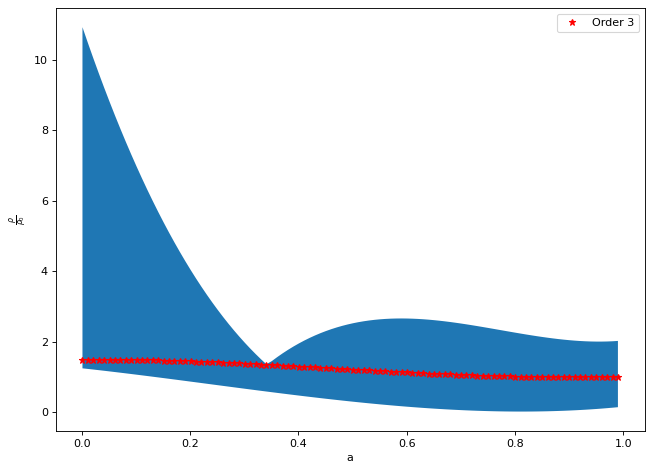

In [63]:
fig=plt.figure(figsize=(9.5,7.0), dpi=80)
#plt.errorbar(a,b,label="Order 3")
plt.errorbar(a,b,fmt="r*",label="Order 3")
plt.fill_between(a,b+np.abs(d),b-np.abs(c))
#plt.plot(a,np.ones_like(a),label="y=1")
plt.xlabel("a")
#plt.ylabel(r"$\frac{\rho}{\rho_0}$")
plt.ylabel(r"$\frac{\rho}{\rho_{0}}$")
plt.legend(loc="best")
fig.savefig("naive_rho_O_3.eps",dpi=fig.dpi,bbox_inches='tight')

In [4]:
#print(pl.getNumSampleSummaryText())
import tempfile, os
#tempdir = os.path.join(tempfile.gettempdir(),'testchaindir')
tempdir = os.getcwd()
if not os.path.exists(tempdir):
    os.makedirs(tempdir)
rootname = os.path.join(tempdir, 'testchain')
jla_smp.saveAsText(rootname)
print(jla_smp.getNumSampleSummaryText())


using 50505 rows, 57 parameters; mean weight 8.46993366993367, tot weight 427774.0
Equiv number of single samples (sum w)/max(w): 840
Effective number of weighted samples (sum w)^2/sum(w^2): 7999



((60.86768477597712, 83.41958522402288),
 (0.731453414013346, 0.920882885986654))

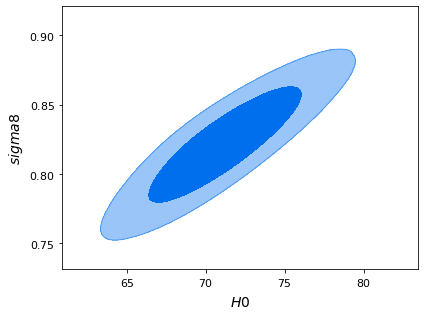

In [5]:
g = plots.get_single_plotter()
g.plot_2d(jla_smp, ['H0', 'sigma8'],filled=True)
#g.export('omega_alpha.pdf')

am_{vaa fld } = 0.830^{+0.14}_{-0.099}
0.7627468


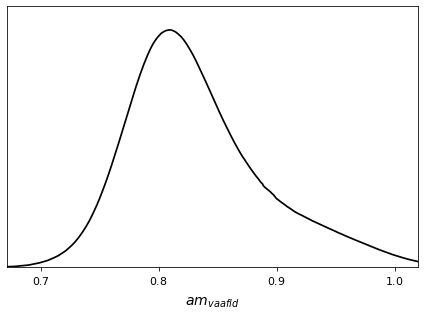

In [14]:
g = plots.get_single_plotter()
g.plot_1d(jla_smp, 'am_vaa_fld')
print(jla_smp.getInlineLatex('am_vaa_fld',limit=2))
print(jla_smp.confidence(p.am_vaa_fld,limfrac=0.025))
g.export('am_vaa_fld.pdf')
bb = jla_smp.get1DDensity("am_vaa_fld.pdf")

In [48]:
lkl = jla_smp.getMargeStats()

In [49]:
ap = lkl.parWithName('am_vaa_fld') 

In [50]:
ap.bestfit_sample

0.8956347

\alpha{}_{vaa fld } = 5.3^{+7.9}_{-7.1}


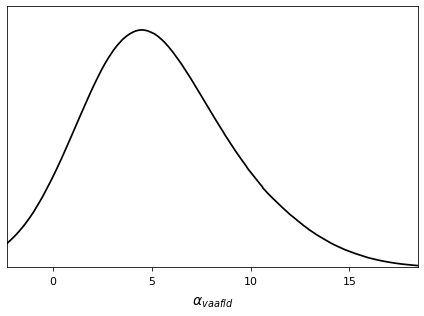

In [7]:
g = plots.get_single_plotter()
g.plot_1d(jla_smp, 'alpha_vaa_fld')
print(jla_smp.getInlineLatex('alpha_vaa_fld',limit=2))
g.export('alpha_vaa_fld.pdf')

\beta{}_{vaa fld } = 11^{+14}_{-12}


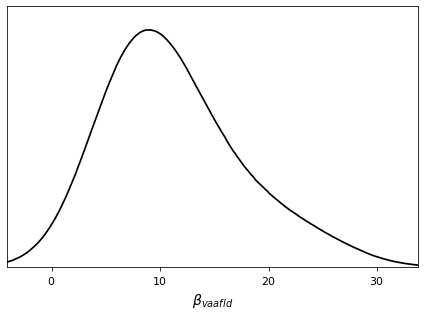

In [8]:
g = plots.get_single_plotter()
g.plot_1d(jla_smp, 'beta_vaa_fld')
print(jla_smp.getInlineLatex('beta_vaa_fld',limit=2))
g.export('beta_vaa_fld.pdf')

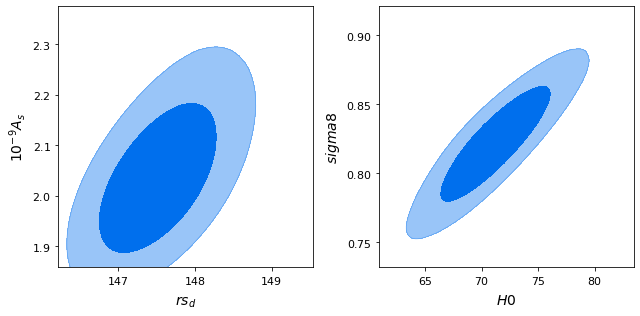

In [9]:
g = plots.get_subplot_plotter(subplot_size=4.5)
g.settings.scaling = False 
g.plots_2d(jla_smp, param_pairs=[['rs_d','A_s'], ['H0', 'sigma8']],nx=2, filled=True)

g.export('rs_d_w0_fld_vaa_H0_sigma8_2d.pdf')

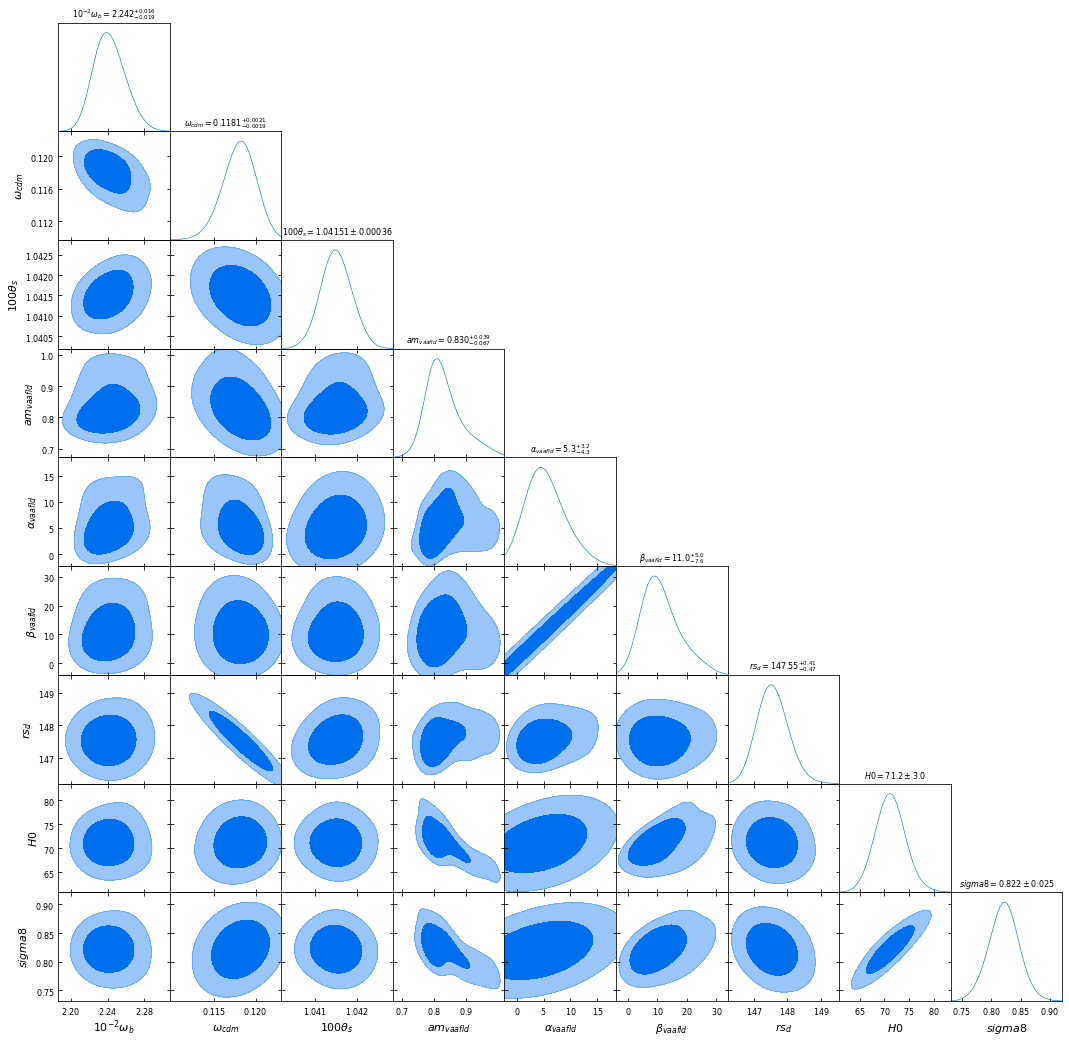

In [35]:
gt = plots.get_subplot_plotter()

gt.triangle_plot(jla_smp,['omega_b', 'omega_cdm', '100theta_s','am_vaa_fld','alpha_vaa_fld','beta_vaa_fld','rs_d','H0', 'sigma8'], filled=True,title_limit=1)
gt.export('triangle_o3.pdf')

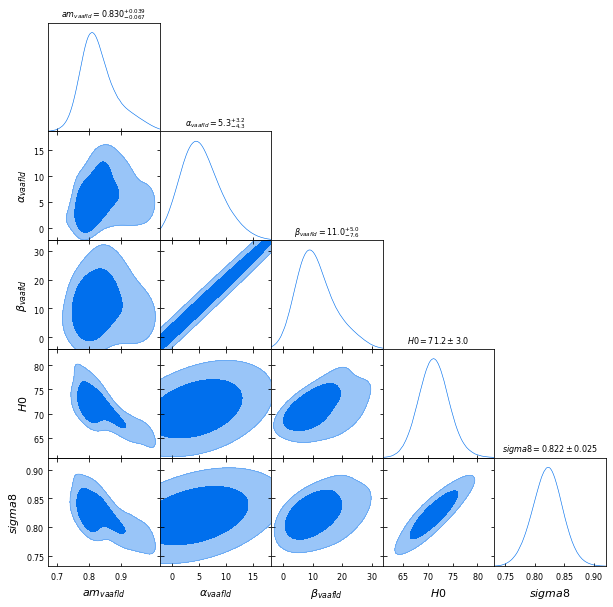

In [18]:
gt = plots.get_subplot_plotter()

gt.triangle_plot(jla_smp,['am_vaa_fld','alpha_vaa_fld','beta_vaa_fld','H0', 'sigma8'], filled=True,title_limit=1)
gt.export('triangle_2_o3.pdf')

In [ ]:
exp = [cmb_o_smp,cmb_bao_smp,bao_smp,jla_smp]


for ex in exp:
    p = ex.getParams() 
    ex.addDerived((p.h*p.phi0_tach_exp)*100.0, name='H0phi0', label='H_0\phi_0')
    ex.addDerived(p.omega_cdm/(p.h*p.h), name='Omega_cdm', label='\Omega_{cdm}')
    ex.addDerived((p.phi0_prime_tach_exp*p.phi0_prime_tach_exp)-1.0, name='w0', label='w_0')
    


In [ ]:
exp_labels=["cmb","cmb+bao","bao","jla"]

In [ ]:
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_1d(exp, 'h', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels,normalized=True)
g.add_x_marker(0.6766,color="red")
#g.add_y_marker(0.311,color="red")
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_h")

In [ ]:
g = plots.get_single_plotter()
jla_smp.updateSettings({'contours': [0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 3
g.plot_2d(jla_smp, 'log10nrec_alpha', 'Omega_fld',filled=True);

In [ ]:
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_1d(exp, 'w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_x_marker(0.6766,color="red")
#g.add_y_marker(0.311,color="red")
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_w0")
print(exp[3].getInlineLatex('w0',limit=1))

In [ ]:
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 14
g.triangle_plot(exp, [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['red','cyan', 'blue','green'],filled=True,title_limit=2,legend_labels=exp_labels)
#g.add_legend(, colored_text=True);
g.export("exp_traingle_cmb_cmb_o_bao_jla")

In [ ]:
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 14
g.triangle_plot(exp[:2], [ 'Omega_cdm','h','sigma8'],contour_colors=['green','red'],filled=True,title_limit=2,legend_labels=exp_labels[:2],markers={'sigma8':0.8102})
#g.add_legend(, colored_text=True);
g.export("exp_traingle_cmb_cmb_o_s8")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp, 'h', 'Omega_cdm', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_x_marker(0.6766,color="red")
g.add_y_marker(0.311,color="red")
g.add_legend(exp_labels,legend_loc='lower left');
g.export("exp_omegacdm_h")

# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp[2:], 'h', 'Omega_cdm', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels[2:])
g.add_x_marker(0.6766,color="red")
g.add_y_marker(0.311,color="red")
g.add_legend(exp_labels[2:],legend_loc='lower left');
g.export("exp_omegacdm_h_cmb")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp, 'h', 'w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_h_w0")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp, 'Omega_cdm','w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_omegacdm_w0")

In [ ]:
k = plots.get_subplot_plotter()
k.settings.figure_legend_frame = False
k.settings.alpha_filled_add=0.4
k.settings.title_limit_fontsize = 14
k.triangle_plot(exp[2:], [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['green',"red"],filled=True,title_limit=1,legend_labels=exp_labels[2:])
#g.add_legend(, colored_text=True);
k.export("exp_traingle_cmb_cmb_bao")

In [ ]:
k = plots.get_subplot_plotter()
k.settings.figure_legend_frame = False
k.settings.alpha_filled_add=0.4
k.settings.title_limit_fontsize = 14
k.triangle_plot(exp[:2], [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['green',"red"],filled=True,title_limit=1,legend_labels=exp_labels[:2])
#g.add_legend(, colored_text=True);
k.export("exp_traingle_jla_bao")

In [ ]:
k = plots.get_subplot_plotter()
k.settings.figure_legend_frame = False
k.settings.alpha_filled_add=0.4
k.settings.title_limit_fontsize = 14
k.triangle_plot(exp[0], [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['green',"red","blue","magenta"],filled=True,title_limit=1,legend_labels=exp_labels[0])
#g.add_legend(, colored_text=True);
k.export("exp_traingle_jla")

In [ ]:
k = plots.get_subplot_plotter()
k.settings.figure_legend_frame = False
k.settings.alpha_filled_add=0.4
k.settings.title_limit_fontsize = 14
k.triangle_plot(exp[1], [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['green',"red","blue","magenta"],filled=True,title_limit=1,legend_labels=exp_labels[1])
k.add_legend(exp_labels[1], colored_text=True);
k.export("exp_traingle_bao")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp, 'log10_tach_exp_phi_a','w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_phi_a_w0")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp[2:], 'log10_tach_exp_phi_a','w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels[2:])
g.add_legend(exp_labels[2:],legend_loc='upper right');
g.export("exp_phi_a_w0_cmb_only")